# Video game sales analysis

Analysis of video game sales trying to answer the following questions:

1- What is the most successful video game console in history?

2- Is there a growing trend in the video game market?

3 - What is the most successful video game genre in each decade? Have gamers' tastes changed over time?

Using data from vgchartz.com downloaded from Kaggle: https://www.kaggle.com/gregorut/videogamesales

In [1]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML


sns.set(rc={"figure.figsize":(12,8)})
sns.set(style="whitegrid")

# Load data

In [2]:
zf = zipfile.ZipFile('../data/vgsales.csv.zip') 
df = pd.read_csv(zf.open('vgsales.csv'))

# Explore and prepare data

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Convert year column to int type

In [4]:
df['Year'] = df['Year'].astype('Int64')

Percentage of NaN values on each column 

In [5]:
df.isnull().mean().sort_values(ascending=False).mul(100).round(2).astype(str) + '%'

Year            1.63%
Publisher       0.35%
Global_Sales     0.0%
Other_Sales      0.0%
JP_Sales         0.0%
EU_Sales         0.0%
NA_Sales         0.0%
Genre            0.0%
Platform         0.0%
Name             0.0%
Rank             0.0%
dtype: object

Clean NaN

In [6]:
# Very few NaN values so we drop all

df_no_nan = df.dropna(how="any")

Fix wrong years - clean after 2016

In [7]:
# Clean years after 2016 (because de data was obtained in 2016)

df_max_2016 = df_no_nan[df_no_nan['Year'] <= 2016].copy()

Fix wrong years - clean games launched before platform launch

In [8]:
plt_launch_year = {'Wii': 2006, 
                   'NES': 1983,  
                   'GB': 1989,
                   'DS': 2004,
                   'X360': 2005,
                   'PS3': 2006,
                   'PS2': 2000,
                   'SNES': 1990,
                   'GBA': 2001,
                   '3DS': 2011,
                   'PS4': 2013,
                   'N64': 1996,
                   'PS': 1994,
                   'XB': 2001,
                   'PC': 1980,
                   '2600': 1977,
                   'PSP': 2004,
                   'XOne': 2013,
                   'GC': 2001,
                   'WiiU': 2012,
                   'GEN': 1988,
                   'DC': 1998,
                   'PSV': 2011,
                   'SAT': 1994,
                   'SCD': 1991,
                   'WS': 1999,
                   'NG': 1990,
                   'TG16': 1987,
                   '3DO': 1993,
                   'GG': 1990,
                   'PCFX': 1994
           }

# New column with platform launch year information (get from Wikipedia)

df_max_2016['Platform_Launch_Year'] = df_max_2016['Platform'].map(plt_launch_year)

Look for wrong dated games

In [9]:
df_max_2016[df_max_2016['Year'] < df_max_2016['Platform_Launch_Year']]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Launch_Year
1350,1352,Disney's DuckTales,GB,1988,Platform,Capcom,0.82,0.23,0.35,0.03,1.43,1989
2083,2085,NFL Fever 2002,XB,2000,Sports,Microsoft Game Studios,0.74,0.21,0.00,0.04,0.99,2001
12270,12272,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,Konami Digital Entertainment,0.05,0.02,0.00,0.00,0.06,2001
15867,15870,Strongest Tokyo University Shogi DS,DS,1985,Action,Mycom,0.00,0.00,0.02,0.00,0.02,2004


Fix wrong dated games when possible or drop if not

In [10]:
df_max_2016.at[1350, 'Year'] = 1990
df_max_2016.at[2083, 'Year'] = 2001
df_max_2016.at[12270, 'Year'] = 2001
df_max_2016.drop(15867, inplace=True)

Check if the date fix have worked as expected

In [11]:
df_max_2016[df_max_2016['Year'] < df_max_2016['Platform_Launch_Year']].shape[0]

0

Now dataframe is clean

In [12]:
df_clean = df_max_2016.copy()

Plot video game global sales per year (with genre information)

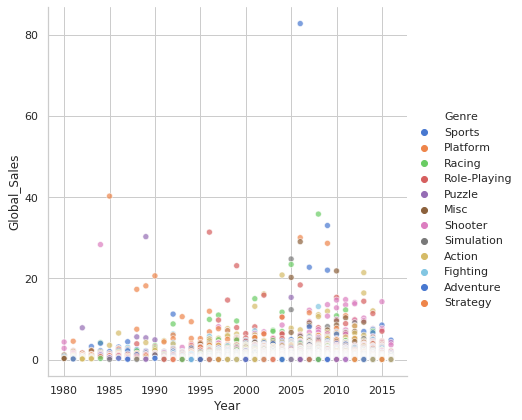

In [13]:
sns_plot = sns.relplot(x="Year", y="Global_Sales", hue="Genre", 
                       alpha=.7, palette="muted",
                       height=6, data=df_clean)

# Save to disk

sns_plot.savefig("../images/exploratory-1.png")

Top 10 more selling games of all times

In [14]:
df_clean[df_clean['Rank'] <= 10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Launch_Year
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1983
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2006
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2006
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1989
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1989
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2004
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2006
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2006
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1983


Plot video game global sales per year (with genre information) just for video games that sold less than 10 million units

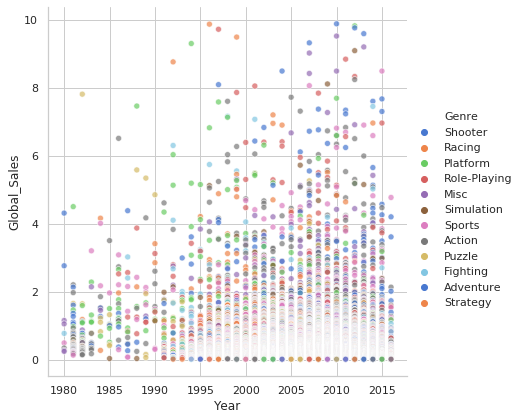

In [15]:
sns_plot = sns.relplot(x="Year", y="Global_Sales", hue="Genre", 
                       alpha=.7, palette="muted",
                       height=6, data=df_clean[df_clean['Global_Sales'] <= 10])

# Save to disk

sns_plot.savefig("../images/exploratory-2.png")

# Analysis

## Question 1 - What is the most successful video game console in history?

I consider the most successful the one for which more video game units have been sold (in millions of units)

In [16]:
# Absolute values of more succesful platforms (in terms of games unit sold)

df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.60
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.07
PC       254.70
Name: Global_Sales, dtype: float64

### Historical evolution

In [17]:
# Grouped by platform and accumulating global sales for each year

df_plt = df_clean.groupby(['Platform', 'Year'])['Global_Sales'].sum().reset_index()
df_plt.head()

,Platform,Year,Global_Sales
0,2600,1980,11.38
1,2600,1981,35.77
2,2600,1982,28.86
3,2600,1983,5.83
4,2600,1984,0.27


Complete the dataset with 0 sales information for all years with no sales

In [18]:
# To be able to acummulate total global sales for a platform we need to fill missing year (years with no sales)
# with a global sale of 0. The way of doing that it's with a datetime index

df_plt['Year'] = pd.to_datetime(df_plt['Year'], format='%Y')
df_plt_di = df_plt.set_index('Year')

# create a row for each platform with information of the last year of the dataset (2017)

max_date = df_plt_di.index.max()
platforms_in_last_year_list = list(df_plt_di.loc[max_date, 'Platform'].unique())
platforms_not_in_last_year_list = list(set(df_plt_di['Platform'].unique()) \
                                           .difference(platforms_in_last_year_list))
platforms_not_in_last_year_df = pd.DataFrame({'Year': max_date, 
                                              'Platform': platforms_not_in_last_year_list, 
                                              'Global_Sales': 0}).set_index('Year')

# resample and bfill to include all missing years (until last year) with sales 0
# and reindex to lost datetime index (not necessary anymore)

df_plt_di_complete = pd.concat([df_plt_di, platforms_not_in_last_year_df]) \
                       .groupby('Platform').resample('AS')['Global_Sales'] \
                       .bfill().reset_index()
df_plt_di_complete['Year'] = df_plt_di_complete['Year'].dt.year

# Add a column with cumulate sum of global sales

df_plt_di_complete['Global_Sales_Cumsum']= df_plt_di_complete \
                                           .groupby('Platform')['Global_Sales'] \
                                           .transform(pd.Series.cumsum) 

Add family for each platform

In [19]:
families = {'Wii': 'Nintendo', 
            'NES': 'Nintendo',  
            'GB': 'Nintendo',
            'DS': 'Nintendo',
            'X360': 'Microsoft',
            'PS3': 'Sony',
            'PS2': 'Sony',
            'SNES': 'Nintendo',
            'GBA': 'Nintendo',
            '3DS': 'Nintendo',
            'PS4': 'Sony',
            'N64': 'Nintendo',
            'PS': 'Sony',
            'XB': 'Microsoft',
            'PC': 'Microsoft',
            '2600': 'Atari',
            'PSP': 'Sony',
            'XOne': 'Microsoft',
            'GC': 'Nintendo',
            'WiiU': 'Nintendo',
            'GEN': 'Sega',
            'DC': 'Sega',
            'PSV': 'Sony',
            'SAT': 'Sega',
            'SCD': 'Sega',
            'WS': 'Bandai',
            'NG': 'SNK',
            'TG16': 'NEC',
            '3DO': 'Panasonic',
            'GG': 'Sega',
            'PCFX': 'NEC'
           }

df_plt_di_complete['Family'] = df_plt_di_complete['Platform'].map(families)

Helper function to calculate the top of a given year

In [20]:
def top_of_year(df, year, top_number=8):
    """Return a dataframe with the top videogames of a given year 
    (top considering accumulate global sales up to that year)

    Parameters:
    df (DataFrame): Dataframe with unit solds for all platforms
    year (int): Year to calculate the top
    top_number (int): Number of rows

    Returns:
    DataFrame: Dataframe with the top

   """
    df = df[df['Year'].eq(year)].sort_values(by='Global_Sales_Cumsum', ascending=True)
    df = df[['Platform', 'Family', 'Global_Sales_Cumsum']]
    row_count = df.shape[0]
    if row_count >= top_number:
        return df.tail(top_number).reset_index(drop=True)
    else:
        df_empty_rows = pd.DataFrame(columns=['Platform', 'Global_Sales_Cumsum', 'Family'])
        for i in range(row_count, top_number):
            df_empty_rows = df_empty_rows.append({'Platform': '-' * (i - row_count + 1), 'Global_Sales_Cumsum': 0, 'Family': 'None'}, ignore_index=True)
        return pd.concat([df_empty_rows, df]).reset_index(drop=True)

Example of use of the helper function: Top 5 for 1995

In [21]:
dff = top_of_year(df_plt_di_complete, 1995, 5)
dff

,Platform,Family,Global_Sales_Cumsum
0,PC,Microsoft,42.13
1,2600,Atari,86.57
2,GB,Nintendo,130.29
3,SNES,Nintendo,182.65
4,NES,Nintendo,251.07


Assign a different color for each family

In [22]:
colors = dict(zip( 
    ["Atari",   "Panasonic", "Nintendo", "Sega",    "SNK",     "Microsoft", "NEC",     "Sony",    "Bandai", "None"],
    ["#c3bc3f", "#bb7693",   "#ef6f6a",  "#8cc2ca", "#767676", "#55ad89",   "#a9b5ae", "#6388b4", "#baa094", "#ffffff"]
))

Function to draw a year

In [23]:
def draw_barchart(year, top_number=8):
    dff = top_of_year(df_plt_di_complete, year, top_number)
    ax.clear()
    ax.barh(dff['Platform'], dff['Global_Sales_Cumsum'], color=[colors[x] for x in dff['Family']])
    dx = dff['Global_Sales_Cumsum'].max() / 200
    for i, (value, name, group) in enumerate(zip(dff['Global_Sales_Cumsum'], dff['Platform'], dff['Family'])):
        if value > 0:
            ax.text(value-dx, i,     name,            size=14, weight=600, ha='right', va='bottom')
            ax.text(value-dx, i-.25, group,           size=10, color='#444444', ha='right', va='baseline')
            ax.text(value+dx, i,     f'{value:,.0f}', size=14, ha='left',  va='center')
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Video game units sold (millions)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'The most successful video game platform from 1980 to 2016',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @tomasborrella; credit @pratapvardhan', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

Example of use of the function to draw a year: Top 6 for 2010

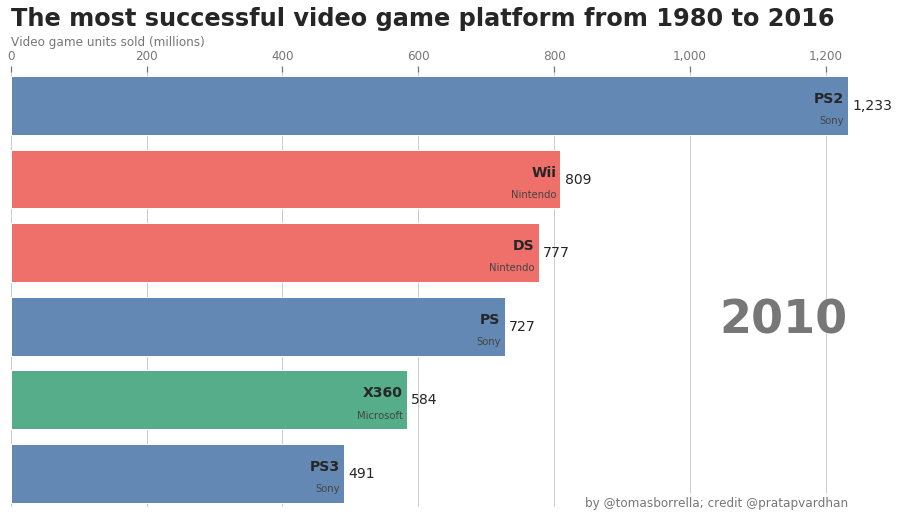

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(2010, 6)

Create animation for the period 1980 - 2016

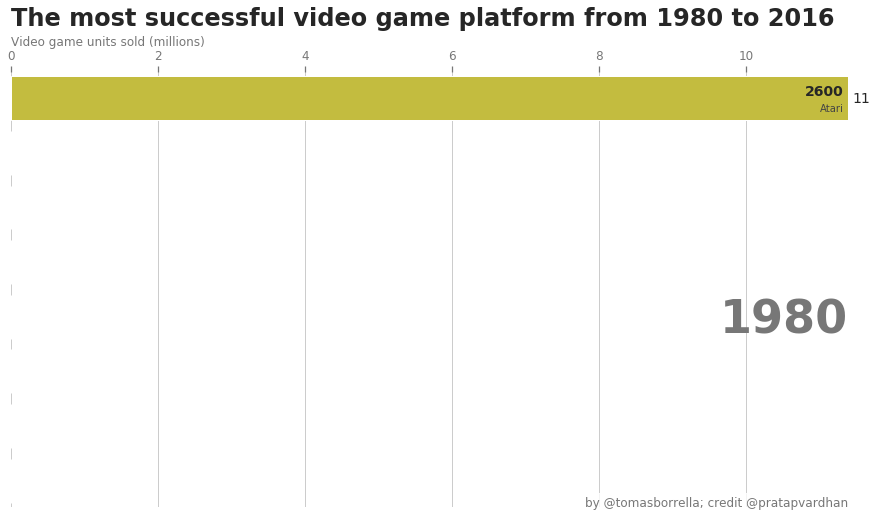

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1980, 2017), interval=1000)

# Save png images to disk

animator.save("../images/animation.png", writer="imagemagick")

# Interactive version for the notebook

HTML(animator.to_jshtml())

# to create a gif of the animation, convert png files to gif with:
#    convert -delay 30 images/animation-*.png images/animation.gif
# note: packages ffmpeg:i386 and x264 could be needed in your system

## Question 2 - Is there a growing trend in the video game market?

Prepare dataframes:

In [26]:
# Group by year and sum global sales

df_global_sales_per_year = df_clean.groupby('Year')['Global_Sales'].sum().reset_index()

# Remove 2016 because the year is not complete 

df_global_sales_per_year = df_global_sales_per_year[df_global_sales_per_year['Year'] < 2016]

# dataframe with maximum value to be able to plot the point

maximum = df_global_sales_per_year['Global_Sales'].abs().max()
df_global_sales_per_year['max'] = df_global_sales_per_year['Global_Sales'] \
                                  .apply(lambda x: np.nan if x < maximum else maximum)
df_max = df_global_sales_per_year.loc[df_global_sales_per_year['max'] == df_global_sales_per_year['max'] \
                                      .max(),['Year', 'Global_Sales']]

Plot using lineplot

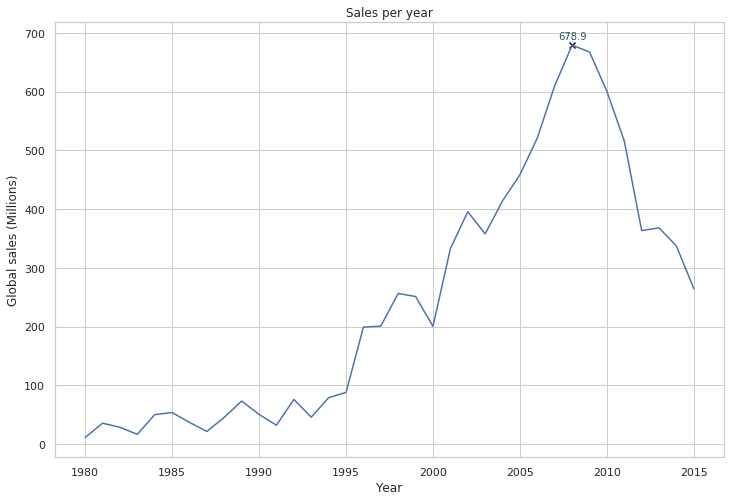

In [27]:
fig, ax = plt.subplots()

sns_plot = sns.lineplot(data=df_global_sales_per_year, x='Year', y='Global_Sales', ci=None, ax=ax)

ax.scatter(df_max.iloc[0]['Year'], 
           df_max.iloc[0]['Global_Sales'], 
           c='k', 
           marker='x')
ax.text(df_max.iloc[0]['Year'], 
        df_max.iloc[0]['Global_Sales'] + 10,
        str(round(df_max.iloc[0]['Global_Sales'],3)),
        ha='center',
        size=10,
        color='#2F4F4F')

ax.set(xlabel="Year", ylabel="Global sales (Millions)", title="Sales per year")

# Save to disk

fig = sns_plot.get_figure()
fig.savefig("../images/question2.png")

## Question 3 - What is the most successful video game genre in each decade? Have gamers' tastes changed over time?

In [28]:
# Create decade column to be able to group

df_clean['Decade'] = ((np.floor(df_clean['Year'] / 10) * 10).astype(int))
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Launch_Year,Decade
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006,2000
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1983,1980
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2006,2000
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2006,2000
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1989,1990


Group by genre and decade

In [29]:
df_clean_grouped = (df_clean
                    .groupby(['Genre', 'Decade'])
                    .Global_Sales
                    .sum()
                    .reset_index())

Add a column with % of global sales per genre

In [30]:
df_clean_grouped['Decade_Global_Sales'] = df_clean_grouped.groupby('Decade').Global_Sales.transform('sum')
df_clean_grouped['%Global_Sales'] = (df_clean_grouped['Global_Sales'] / df_clean_grouped['Decade_Global_Sales']).mul(100).round(2)
df_clean_grouped.head()

,Genre,Decade,Global_Sales,Decade_Global_Sales,%Global_Sales
0,Action,1980,51.16,375.13,13.64
1,Action,1990,139.29,1280.34,10.88
2,Action,2000,858.91,4636.08,18.53
3,Action,2010,673.45,2520.06,26.72
4,Adventure,1980,4.78,375.13,1.27


3 most popular genres in each decade

In [31]:
popular_genres = set()
for i in [1980, 1990, 2000, 2010]:
    a, b, c = df_clean_grouped[df_clean_grouped['Decade'] == i].sort_values('%Global_Sales', ascending=False)['Genre'].head(3)
    popular_genres.add(a)
    popular_genres.add(b)
    popular_genres.add(c)
popular_genres

{'Action',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Sports'}

Filter data with the list of popular genres

In [32]:
dff = df_clean_grouped[df_clean_grouped['Genre'].isin(popular_genres)]

Plot using lineplot

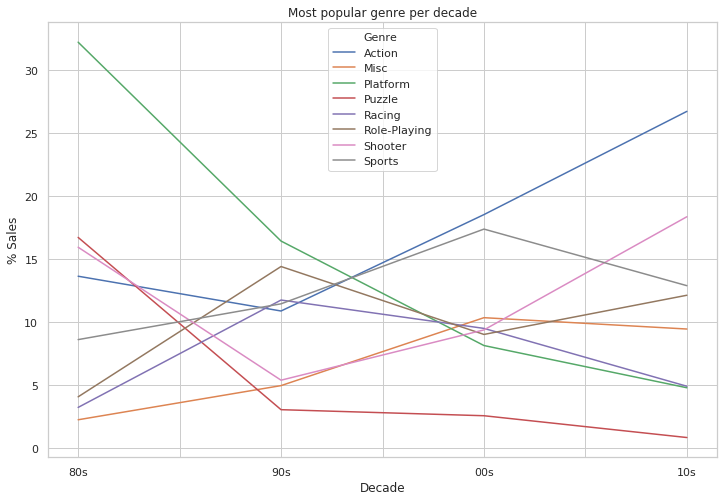

In [33]:
fig, ax = plt.subplots()

sns_plot = sns.lineplot(data=dff, x='Decade', y='%Global_Sales', hue='Genre')
ax.set_xticklabels(['', '80s', '', '90s', '', '00s', '', '10s'])
ax.set(xlabel="Decade", ylabel="% Sales", title="Most popular genre per decade")

# Save to disk

fig = sns_plot.get_figure()
fig.savefig("../images/question3-1.png")

Plot using barplot

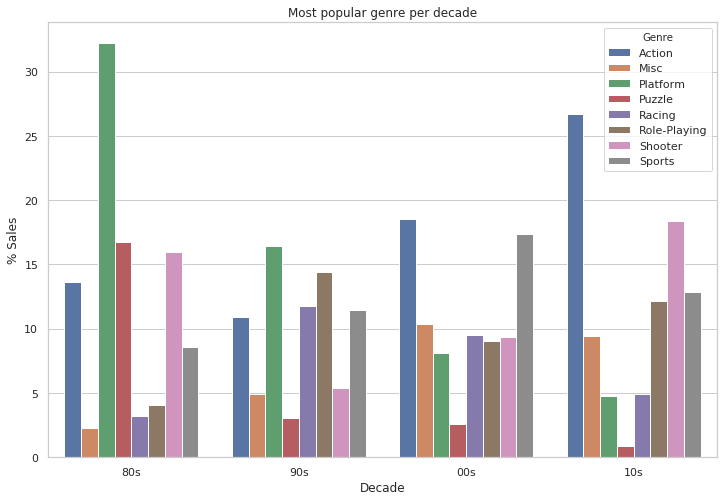

In [34]:
fig, ax = plt.subplots()

sns_plot = sns.barplot(data=dff, x='Decade', y='%Global_Sales', hue='Genre')
ax.set_xticklabels(['80s', '90s', '00s', '10s'])
ax.set(xlabel="Decade", ylabel="% Sales", title="Most popular genre per decade")

# Save to disk

fig = sns_plot.get_figure()
fig.savefig("../images/question3-2.png")